In [1]:
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
loaded_model = load_model("saved_model.h5")

<br>

## Preprocessing of image

In [3]:
import cv2
import base64

In [4]:
# load the  base64 img from file

def load_base64_img():
    with open('img.txt') as f:
        return f.read()

In [5]:
# convert the base64 image/ image path --> transparent image to white background ---> to array using cv2

def get_cv2_image_from_base64_string(b64str, img_path):
    if img_path:
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    else:
        encoded_data = b64str.split(',')[1]
        nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_UNCHANGED) # load the image with alpha channel
        
    
    ## transparent to white bg 
    alpha_channel = img[: ,: , 3]
    _, mask = cv2.threshold(alpha_channel, 254, 255, cv2.THRESH_BINARY) # binarize mask
    color = img[: ,: ,: 3]
    new_img = cv2.bitwise_not(cv2.bitwise_not(color, mask = mask))
    return new_img

In [6]:
# resizing the image into 28x28 pixels

def get_img_reshape_by_cv2(img_data):
    image = img_data
    grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY) # convert to gray
    ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    preprocessed_digits = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        roi = cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=1)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (500, 500))
        # resized_digit = cv2.resize(resized_digit, (500,500))
        resized_digit = cv2.resize(resized_digit, (400,400))
        resized_digit = cv2.resize(resized_digit, (300,300))
        resized_digit = cv2.resize(resized_digit, (200,200))
        resized_digit = cv2.resize(resized_digit, (100,100))
        
        resized_digit = cv2.resize(resized_digit, (50,50))
        resized_digit = cv2.resize(resized_digit, (40,40))
        resized_digit = cv2.resize(resized_digit, (25,25))
        resized_digit = cv2.resize(resized_digit, (18,18)) ##### <------

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # plt.imshow(padded_digit)
        
        
        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)

    # plt.imshow(padded_digit, cmap="gray")
    # plt.show()
    
    # print(preprocessed_digits)
    inp = np.array(preprocessed_digits)
    return inp

<br>

## Predict 

In [7]:
n_img = get_cv2_image_from_base64_string(load_base64_img(), None)

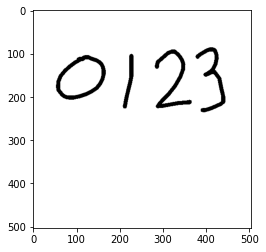

In [8]:
plt.imshow(n_img)

In [9]:
crop_img = get_img_reshape_by_cv2(n_img)

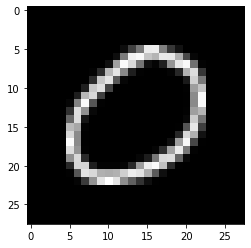

In [10]:
plt.gray()
plt.imshow(crop_img[0])

In [11]:
num_pred = []

# pred = loaded_model.predict(crop_img)
for i in range(len(crop_img)):
    
    if len(crop_img) > 1:
        pred = loaded_model.predict(crop_img[i].reshape(1,28,28))
    else:
        pred = loaded_model.predict(crop_img)
        
    num_pred.append(np.argmax(pred))
num_pred

1/1 [==============================] - 0s 15ms/step


[0, 1, 2, 3]

In [12]:
num_pred

[0, 1, 2, 3]